In [52]:
from qiskit import QuantumCircuit
from IPython.display import display
from qiskit.quantum_info import Statevector
import pylatexenc

Implementamos el algoritmo para el caso de r=2 y entrada de 2 bits es decir que $x\in{1,2,3,4}$


🔹 Circuito inicial:


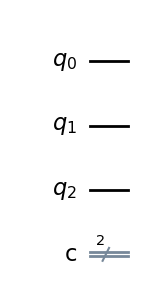

In [ ]:
t=2
L=1
#primero creamos un circuito con t+L qubits, los t primeros son los preparados inicialmente y los que evolucionan
#los L qubits son los de salida
qc=QuantumCircuit(t+L,t)
x_qubits = list(range(t))  # qubits 0 y 1
y_qubit = t                # qubit 2


print("Circuito inicial:")
display(qc.draw("mpl"))

🔹 Después de aplicar Hadamard a qubits de entrada:


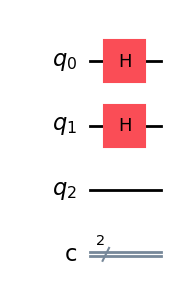

🔹 Estado después de Hadamards:
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j],
            dims=(2, 2, 2))


In [ ]:
#Ahora aplico hadamart al registro de entradas
qc.h(x_qubits)
print("🔹 Después de aplicar Hadamard a qubits de entrada:")
display(qc.draw("mpl"))
state = Statevector.from_instruction(qc)
print("Estado después de Hadamards:")
print(state)

🔹 Después de aplicar el oráculo (f(x) = f(x + 2)):


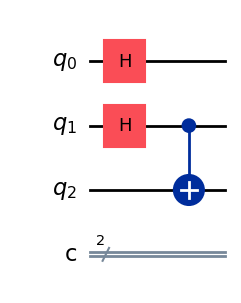

🔹 Estado después del oraculo:
Statevector([0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
             0.5+0.j],
            dims=(2, 2, 2))


In [ ]:
#aplicamos la compuerta C-Not
qc.cx(x_qubits[1],y_qubit)
print("Después de aplicar el oráculo (f(x) = f(x + 2)):")
display(qc.draw("mpl")) 
state = Statevector.from_instruction(qc)
print("Estado después del oraculo:")
print(state)

🔹 Después de aplicar la QFT inversa:


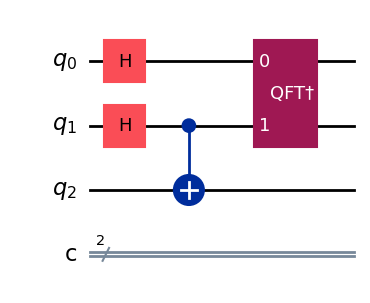

🔹 Estado después de la QFT inversa:
Statevector([ 0.5 +0.j  ,  0.25-0.25j,  0.  +0.j  ,  0.25+0.25j,
              0.5 +0.j  , -0.25+0.25j,  0.  +0.j  , -0.25-0.25j],
            dims=(2, 2, 2))


In [ ]:
#Ahora aplicamos QFT al primer registro
from qiskit.circuit.library import QFT
qft_inv = QFT(num_qubits=t, inverse=True, do_swaps=True).to_gate()
qft_inv.name = "QFT†"
qc.append(qft_inv, x_qubits)

print("Después de aplicar la QFT inversa:")
display(qc.draw("mpl"))
state = Statevector.from_instruction(qc)
print("Estado después de la QFT inversa:")
print(state)

🔹 Después de medir los qubits de entrada:


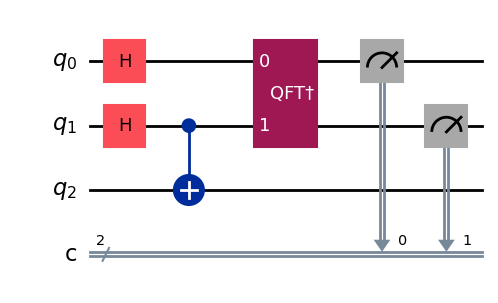

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
qc.measure(x_qubits, range(t))
print("Después de medir los qubits de entrada:")
display(qc.draw("mpl"))